In [18]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Definisi direktori dataset
dataset_dir = 'Dataset'  # Ganti dengan path direktori dataset Anda

# Definisi parameter
batch_size = 32
image_size = (224,224)  # Ukuran gambar yang telah diresize

# Inisialisasi ImageDataGenerator untuk pra-pemrosesan gambar
datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalisasi warna

# Memuat dataset dan membaginya menjadi set pelatihan, validasi, dan pengujian
train_datagen = datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),  # Folder pelatihan
    classes=['matang','belum_matang','bukan_apple'],
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Mode untuk klasifikasi
    shuffle=True,  # Acak data
)

valid_datagen = datagen.flow_from_directory(
    os.path.join(dataset_dir, 'valid'),  # Folder validasi
    classes=['matang','belum_matang','bukan_apple'],
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,  # Tidak perlu diacak
)

test_datagen = datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),  # Folder pengujian
    classes=['matang','belum_matang','bukan_apple'],
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,  # Tidak perlu diacak
)

# Opsi jika Anda ingin mengakses label dan nama kelas


Found 3160 images belonging to 3 classes.
Found 517 images belonging to 3 classes.
Found 346 images belonging to 3 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Inisialisasi model
model = Sequential()

# Lapisan konvolusi
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

# Lapisan konvolusi tambahan
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Lapisan flatten
model.add(Flatten())

# Lapisan terhubung sepenuhnya
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 kelas (misalnya: belum matang, setengah matang, matang)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Pelatihan model
history = model.fit(
    train_datagen,
    epochs=10,  # Ganti dengan jumlah epochs yang sesuai
    validation_data=valid_datagen
)

# Evaluasi model
test_loss, test_accuracy = model.evaluate(test_datagen)
print(f'Test accuracy: {test_accuracy}')

# Prediksi
predictions = model.predict(test_datagen)

# Anda dapat menggunakan predictions untuk melihat hasil prediksi pada data pengujian

Epoch 1/10
99/99 [==============================] - 172s 2s/step - loss: 0.2685 - accuracy: 0.9006 - val_loss: 0.0857 - val_accuracy: 0.9729
Epoch 2/10
99/99 [==============================] - 165s 2s/step - loss: 0.0366 - accuracy: 0.9924 - val_loss: 0.0294 - val_accuracy: 0.9903
Epoch 3/10
99/99 [==============================] - 187s 2s/step - loss: 0.0107 - accuracy: 0.9984 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 4/10
99/99 [==============================] - 176s 2s/step - loss: 0.0040 - accuracy: 0.9997 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 5/10
99/99 [==============================] - 176s 2s/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/10
99/99 [==============================] - 176s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 8.2149e-04 - val_accuracy: 1.0000
Epoch 7/10
99/99 [==============================] - 175s 2s/step - loss: 7.3829e-04 - accuracy: 1.0000 - val_loss: 6.7007e-04 - val_accuracy: 1.0000
E

In [21]:
model.evaluate(valid_datagen)

17/17 [==============================] - 6s 361ms/step - loss: 3.9127e-04 - accuracy: 1.0000


[0.00039126910269260406, 1.0]

In [22]:
# Simpan model ke dalam file
model.save("model_2.h5")

c:\Users\Sari\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 579ms/step


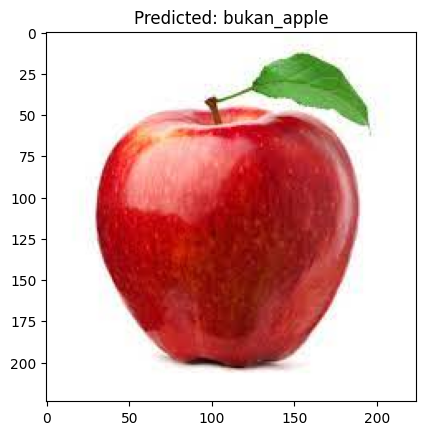

1/1 [==============================] - 0s 81ms/step


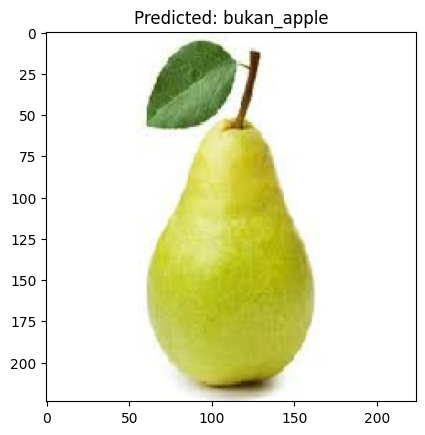

1/1 [==============================] - 0s 46ms/step


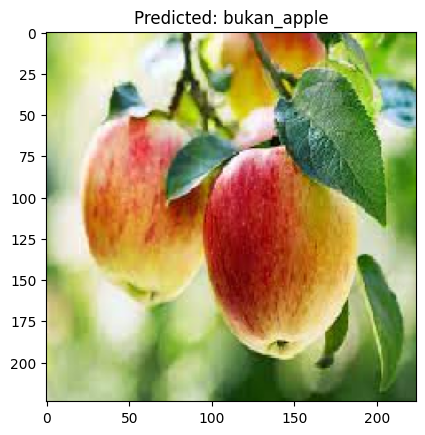

1/1 [==============================] - 0s 49ms/step


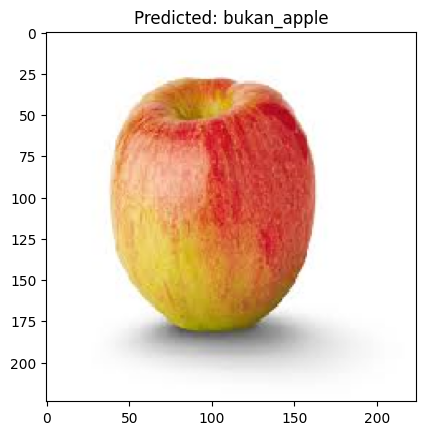

1/1 [==============================] - 0s 50ms/step


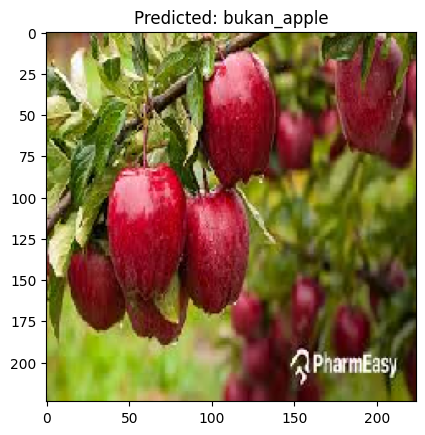

1/1 [==============================] - 0s 45ms/step


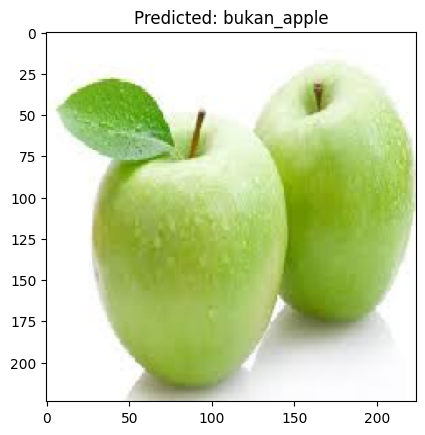

1/1 [==============================] - 0s 62ms/step


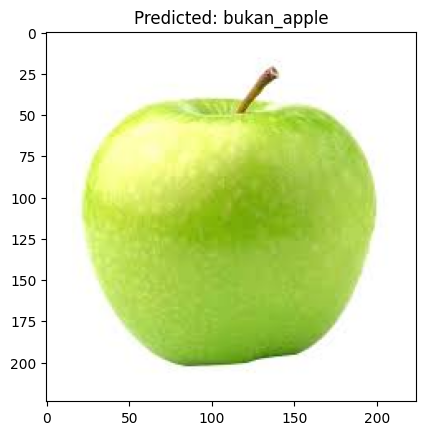

1/1 [==============================] - 0s 63ms/step


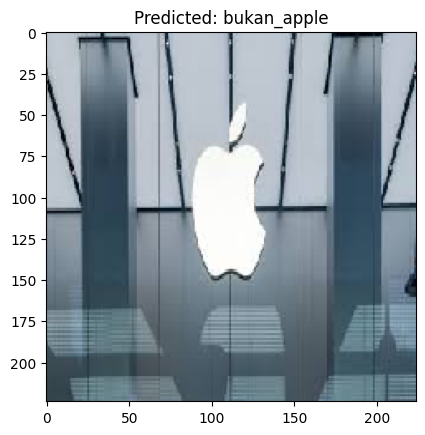

1/1 [==============================] - 0s 39ms/step


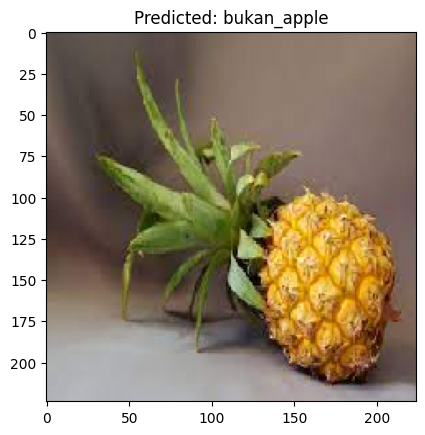

1/1 [==============================] - 0s 45ms/step


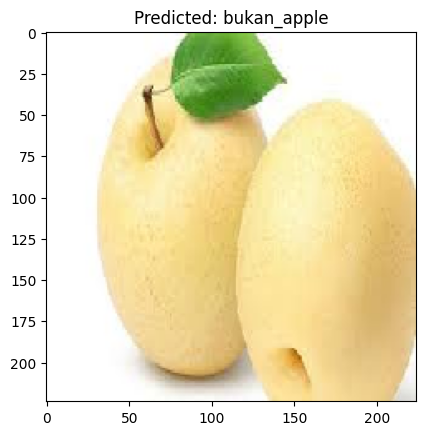

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Ganti dengan lokasi model yang telah Anda latih
model = load_model("model_2.h5")

# Ganti dengan path ke folder yang berisi gambar-gambar yang akan Anda prediksi
image_folder = 'image'

# Daftar file gambar dalam folder
image_files = os.listdir(image_folder)

# Daftar kelas yang digunakan saat pelatihan model
class_names = ["matang", "belum_matang", "bukan_apple"]

# Untuk setiap gambar dalam folder
for image_file in image_files:
    # Load gambar
    img = image.load_img(os.path.join(image_folder, image_file), target_size=(224, 224))
    x = image.img_to_array(img)
    
    # Lakukan prediksi
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    
    # Ambil kelas dengan probabilitas tertinggi
    predicted_class = np.argmax(predictions)
    
    # Tampilkan gambar
    plt.imshow(img)
    
    # Tampilkan hasil prediksi
    if predicted_class == 0:
        prediction_label = class_names[0]  # Mature
    elif predicted_class == 1:
        prediction_label = class_names[1]  # Not Mature
    else:
        prediction_label = class_names[2]  # Not Apple
    
    plt.title(f"Predicted: {prediction_label}")
    plt.show()


1/1 [==============================] - 1s 741ms/step
[0. 0. 1.]
gambar_1.jpg adalah belum matang (belum matang)
1/1 [==============================] - 0s 45ms/step
[0. 0. 1.]
gambar_10.jpg adalah belum matang (belum matang)
1/1 [==============================] - 0s 56ms/step
[0. 0. 1.]
gambar_2.jpg adalah belum matang (belum matang)
1/1 [==============================] - 0s 73ms/step
[0. 0. 1.]
gambar_3.jpg adalah belum matang (belum matang)
1/1 [==============================] - 0s 46ms/step
[0. 0. 1.]
gambar_4.jpg adalah belum matang (belum matang)
1/1 [==============================] - 0s 54ms/step
[0. 0. 1.]
gambar_5.jpg adalah belum matang (belum matang)
1/1 [==============================] - 0s 47ms/step
[0. 0. 1.]
gambar_6.jpg adalah belum matang (belum matang)
1/1 [==============================] - 0s 69ms/step
[0. 0. 1.]
gambar_7.jpg adalah belum matang (belum matang)
1/1 [==============================] - 0s 55ms/step
[0. 0. 1.]
gambar_8.jpg adalah belum matang (belum matang)

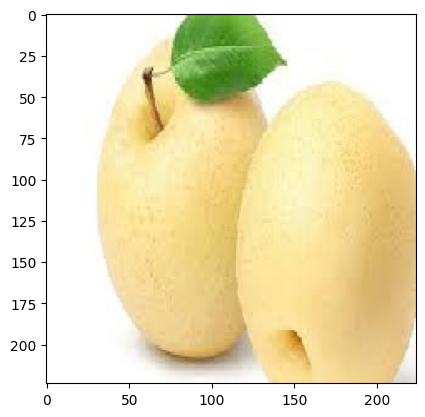

In [24]:
# Ganti dengan lokasi model yang telah Anda latih
model = load_model("model_2.h5")

# Ganti dengan path ke folder yang berisi gambar-gambar yang akan Anda prediksi
image_folder = 'image'

# Daftar file gambar dalam folder
image_files = os.listdir(image_folder)

# Daftar kelas yang digunakan saat pelatihan model
class_names = ["matang", "belum matang"]

# Untuk setiap gambar dalam folder
for image_file in image_files:
    # Load gambar
    img = image.load_img(os.path.join(image_folder, image_file), target_size=(224, 224))
    x = image.img_to_array(img)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0][0] < 0.5:
        print(f"{image_file} adalah {class_names[1]} (belum matang)")
    else:
        print(f"{image_file} adalah {class_names[0]} (matang)")



In [8]:
# Kemudian, untuk menggunakan model di tempat lain:

#from tensorflow.keras.models import load_model

# Load model dari file yang telah disimpan
#loaded_model = load_model("model_fruit_maturity.h5")

# Evaluasi model pada data pengujian
#test_loss, test_accuracy = loaded_model.evaluate(test_datagen)
#print(f'Test accuracy: {test_accuracy}')

# Prediksi
#predictions = loaded_model.predict(test_datagen)

# Anda dapat menggunakan predictions untuk melihat hasil prediksi pada data pengujian
